In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\\Users\\Thais\\Downloads\\Data Study\\Projetos\\Online Sales\\Online_Sales_Data.csv')

In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [7]:
# Alterar o tipo de dado da coluna date para o formato correto
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# Faturamento total
df['Total Revenue'].sum()

80567.84999999999

In [9]:
# Total de Unidades vendidas
df['Units Sold'].sum()

518

In [10]:
# Unidades vendidas de cada categoria
Units_Category = df.groupby(['Product Category'])['Units Sold'].sum().reset_index()
Units_Category.columns = ['Product Category','Units Sold']
Units_Category

,Product Category,Units Sold
0,Beauty Products,46
1,Books,114
2,Clothing,145
3,Electronics,66
4,Home Appliances,59
5,Sports,88


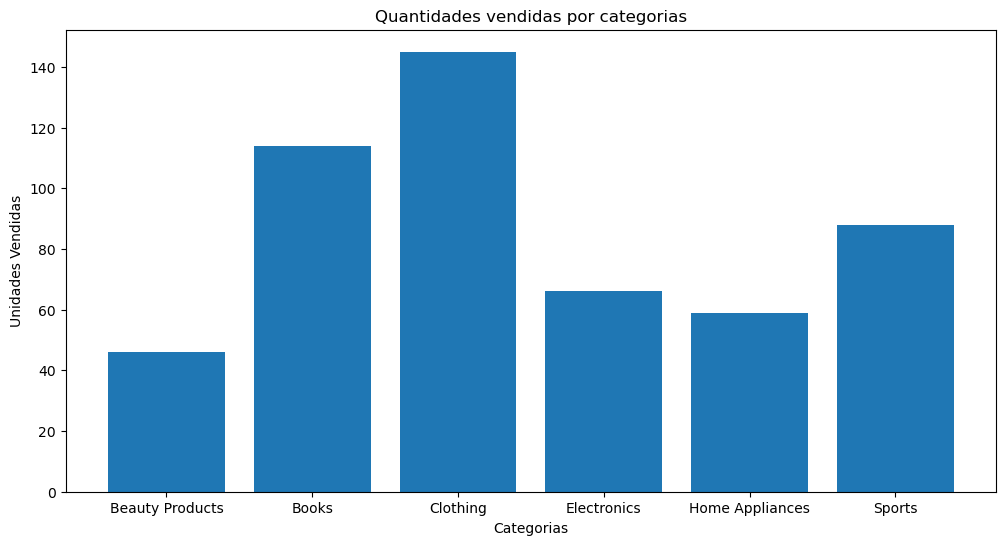

In [11]:
# Gráfico de Quantidades vendidas por categorias
plt.figure(figsize=(12,6))
plt.bar(Units_Category['Product Category'], Units_Category['Units Sold'])
plt.xlabel('Categorias')
plt.ylabel('Unidades Vendidas')
plt.title('Quantidades vendidas por categorias')
plt.show()

In [12]:
# Quantos Produtos há por categoria
product_name_counts = df.groupby(['Product Category'])['Product Name'].count()
product_name_counts

Product Category
Beauty Products    40
Books              40
Clothing           40
Electronics        40
Home Appliances    40
Sports             40
Name: Product Name, dtype: int64

In [13]:
# Receita por categoria
Revenue_Category = df.groupby(['Product Category'])['Total Revenue'].sum().reset_index()
Revenue_Category.columns = ['Product Category','Total Revenue']
Revenue_Category

,Product Category,Total Revenue
0,Beauty Products,2621.90
1,Books,1861.93
2,Clothing,8128.93
3,Electronics,34982.41
4,Home Appliances,18646.16
5,Sports,14326.52


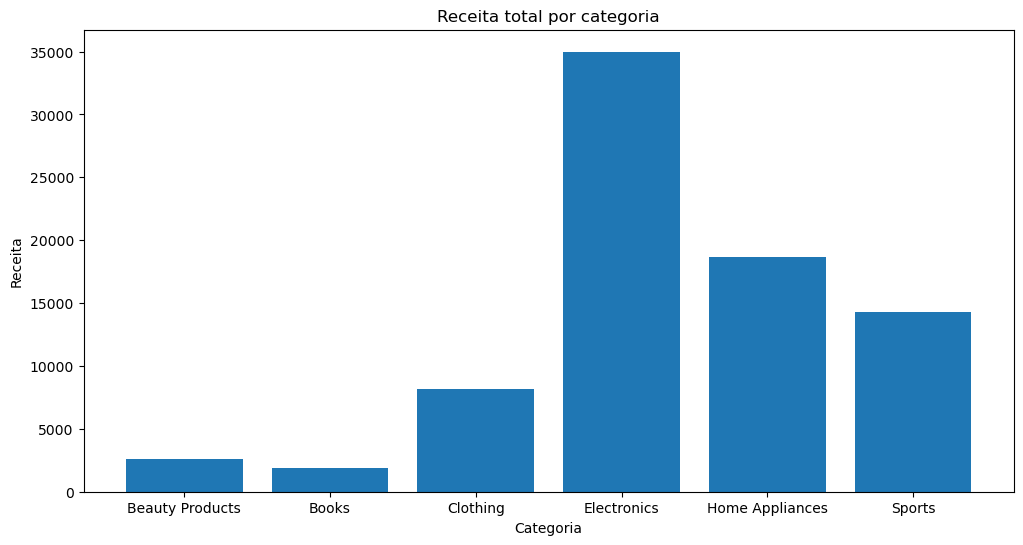

In [14]:
# Gráfico de Receita total por categoria
plt.figure(figsize=(12,6))
plt.bar(Revenue_Category['Product Category'],Revenue_Category['Total Revenue'])
plt.xlabel('Categoria')
plt.ylabel('Receita')
plt.title('Receita total por categoria')
plt.show()

In [15]:
# Média de preço por categoria
Media_price_Category = df.groupby(['Product Category'])['Unit Price'].mean().sort_values().reset_index()
Media_price_Category.columns = ['Product Category','Unit Price']
Media_price_Category

,Product Category,Unit Price
0,Books,16.1530
1,Beauty Products,61.6230
2,Clothing,67.5365
3,Sports,261.2840
4,Home Appliances,320.1855
5,Electronics,691.5915


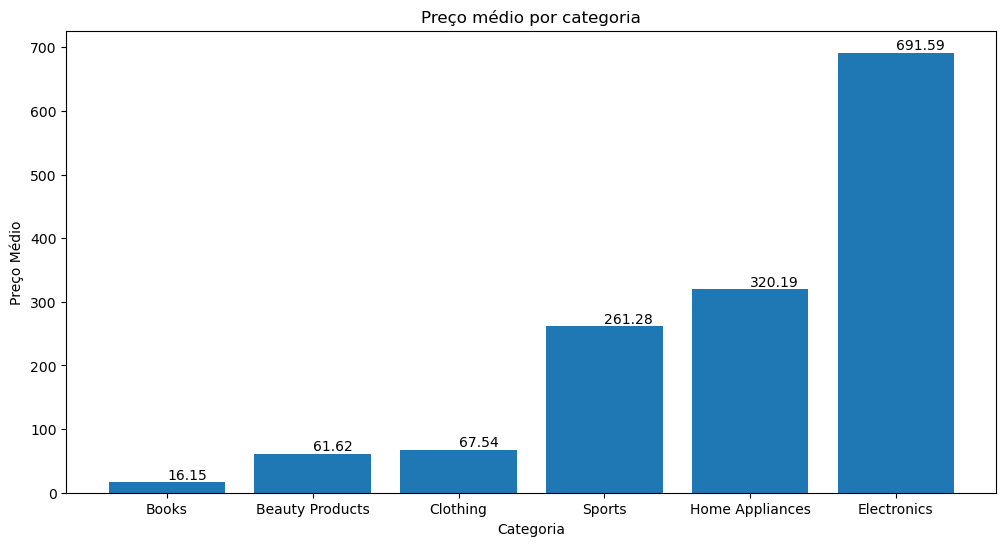

In [16]:
# Gráfico de Preço médio por categoria
plt.figure(figsize=(12,6))
bars = plt.bar(Media_price_Category['Product Category'], Media_price_Category['Unit Price'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), va='bottom')

plt.xlabel('Categoria')
plt.ylabel('Preço Médio')
plt.title('Preço médio por categoria')
plt.show()

In [17]:
# Unidades vendidas por Região
units_region = df.groupby(['Region'])['Units Sold'].sum().sort_values(ascending=False).reset_index()
units_region.columns = ['Region', 'Units Sold']
units_region

,Region,Units Sold
0,Asia,233
1,North America,180
2,Europe,105


In [18]:
# Receita por Região
Revenue_region = df.groupby(['Region'])['Total Revenue'].sum().sort_values(ascending=False).reset_index()
Revenue_region.columns = ['Region', 'Total Revenue']
Revenue_region 

,Region,Total Revenue
0,North America,36844.34
1,Asia,22455.45
2,Europe,21268.06


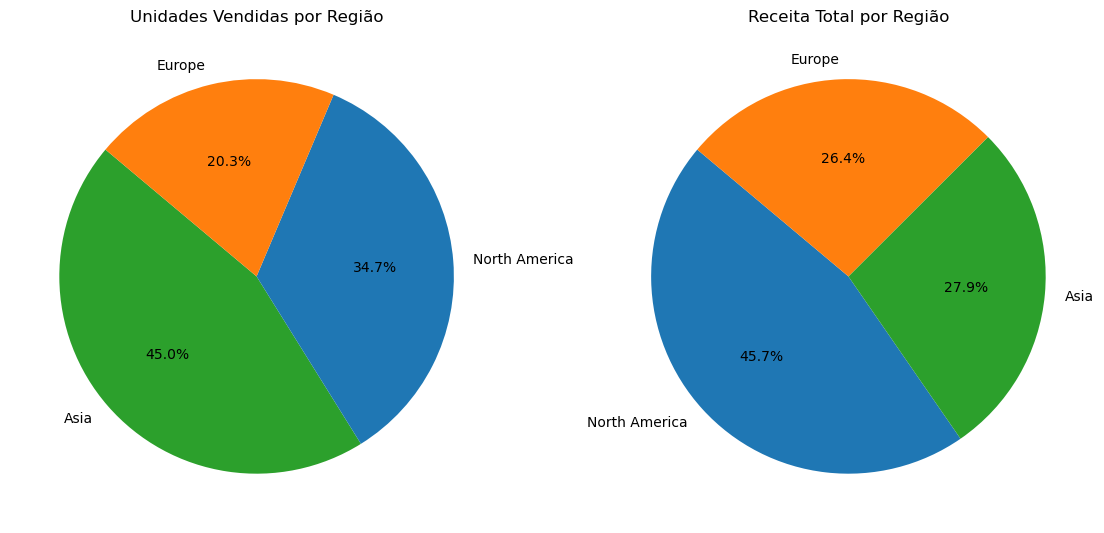

In [19]:
# Gráfio de pizza para Unidades vendidas
colors = {
    'North America': '#1f77b4',
    'Europe': '#ff7f0e',
    'Asia': '#2ca02c',}

units_region_colors = [colors[region] for region in units_region['Region']]
Revenue_region_colors = [colors[region] for region in Revenue_region['Region']]

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(units_region['Units Sold'], labels=units_region['Region'], autopct='%1.1f%%', startangle=140, colors=units_region_colors)
ax[0].set_title('Unidades Vendidas por Região')

# Gráfio de pizza para Unidades receita
ax[1].pie(Revenue_region['Total Revenue'], labels=Revenue_region['Region'], autopct='%1.1f%%', startangle=140, colors=Revenue_region_colors)
ax[1].set_title('Receita Total por Região')

plt.show()

In [20]:
# Receita total de compras por categorias e por região
europe_df = df[df['Region'] == 'Europe']
europe_units = europe_df.groupby('Product Category')['Total Revenue'].sum().reset_index()
europe_units


,Product Category,Total Revenue
0,Beauty Products,2621.90
1,Home Appliances,18646.16


In [21]:
# Receita da Ásia
asia_df = df[df['Region'] == 'Asia']
asia_units = asia_df.groupby('Product Category')['Total Revenue'].sum().reset_index()
asia_units

,Product Category,Total Revenue
0,Clothing,8128.93
1,Sports,14326.52


In [22]:
# Receita da North_America
North_America_df = df[df['Region'] == 'North America']
North_America_units = North_America_df.groupby('Product Category')['Total Revenue'].sum().reset_index()
North_America_units

,Product Category,Total Revenue
0,Books,1861.93
1,Electronics,34982.41


In [23]:
df['Month'] = df['Date'].dt.month

In [24]:
# Vendas por região e mês
sales_region_category = df.groupby(['Region','Month'])['Units Sold'].sum().reset_index()
sales_region_category

,Region,Month,Units Sold
0,Asia,1,33
1,Asia,2,34
2,Asia,3,40
3,Asia,4,28
4,Asia,5,27
5,Asia,6,27
6,Asia,7,23
7,Asia,8,21
8,Europe,1,11
9,Europe,2,15


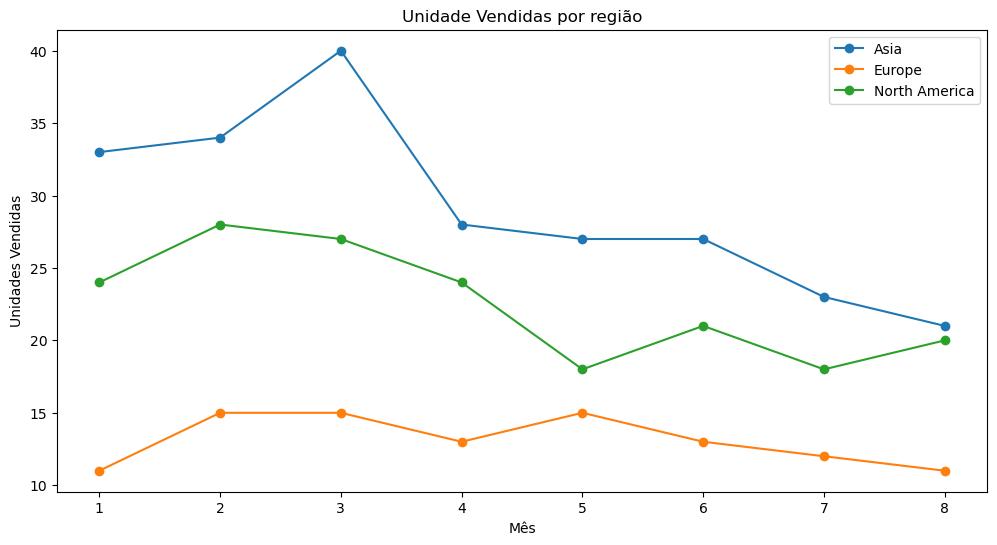

In [25]:
# Gráfico Unidade Vendidas por região
plt.figure(figsize=(12,6))
for category in sales_region_category['Region'].unique():
    category_data = sales_region_category[sales_region_category['Region'] == category]
    plt.plot(category_data['Month'].astype(str), category_data['Units Sold'], marker='o', linestyle='-', label=category)
    
plt.xlabel('Mês') 
plt.ylabel('Unidades Vendidas')
plt.title('Unidade Vendidas por região')
plt.legend()
plt.show()

In [26]:
# Receita por região e mês
revenue_region_category = df.groupby(['Region','Month'])['Total Revenue'].sum().reset_index()
revenue_region_category

,Region,Month,Total Revenue
0,Asia,1,3369.67
1,Asia,2,4278.68
2,Asia,3,2619.60
3,Asia,4,3329.60
4,Asia,5,1989.54
5,Asia,6,1945.38
6,Asia,7,2744.36
7,Asia,8,2178.62
8,Europe,1,2869.89
9,Europe,2,3201.90


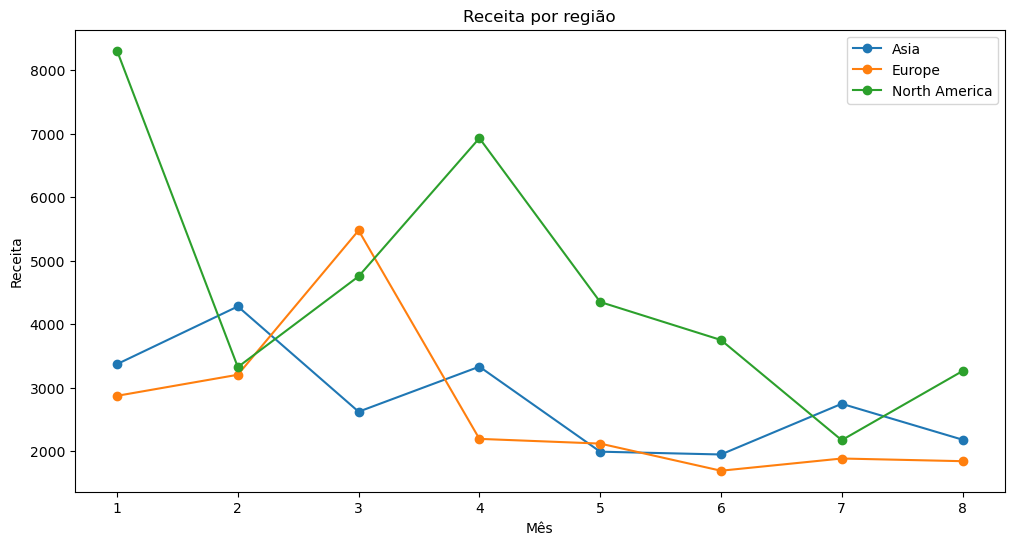

In [27]:
# Gráfico de Receita por região
plt.figure(figsize=(12,6))
for category in revenue_region_category['Region'].unique():
    category_data = revenue_region_category[revenue_region_category['Region'] == category]
    plt.plot(category_data['Month'].astype(str), category_data['Total Revenue'], marker='o', linestyle='-', label=category)
    
plt.xlabel('Mês') 
plt.ylabel('Receita')
plt.title('Receita por região')
plt.legend()
plt.show()

In [28]:
# Extrair o mês e ano das datas
df['Month'] = df['Date'].dt.to_period('M')

units_month = df.groupby(['Month'])['Units Sold'].sum().reset_index()
units_month.columns = ['Month', 'Units Sold']
units_month

,Month,Units Sold
0,2024-01,68
1,2024-02,77
2,2024-03,82
3,2024-04,65
4,2024-05,60
5,2024-06,61
6,2024-07,53
7,2024-08,52


In [29]:
# Receita por mês
Revenue_month = df.groupby(['Month'])['Total Revenue'].sum().reset_index()
Revenue_month.columns = ['Month', 'Total Revenue']
Revenue_month

,Month,Total Revenue
0,2024-01,14548.32
1,2024-02,10803.37
2,2024-03,12849.24
3,2024-04,12451.69
4,2024-05,8455.49
5,2024-06,7384.55
6,2024-07,6797.08
7,2024-08,7278.11


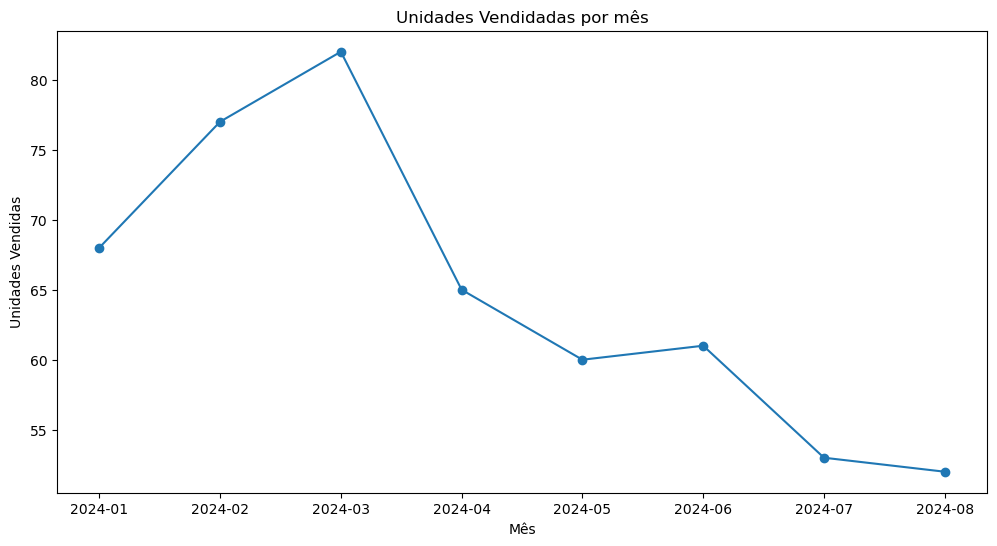

In [30]:
# Criando gráfico de linha para quantidade de produtos vendidos por mês
plt.figure(figsize=(12,6))
plt.plot(units_month['Month'].astype(str), units_month['Units Sold'], marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Unidades Vendidas')
plt.title('Unidades Vendidadas por mês')
plt.show()


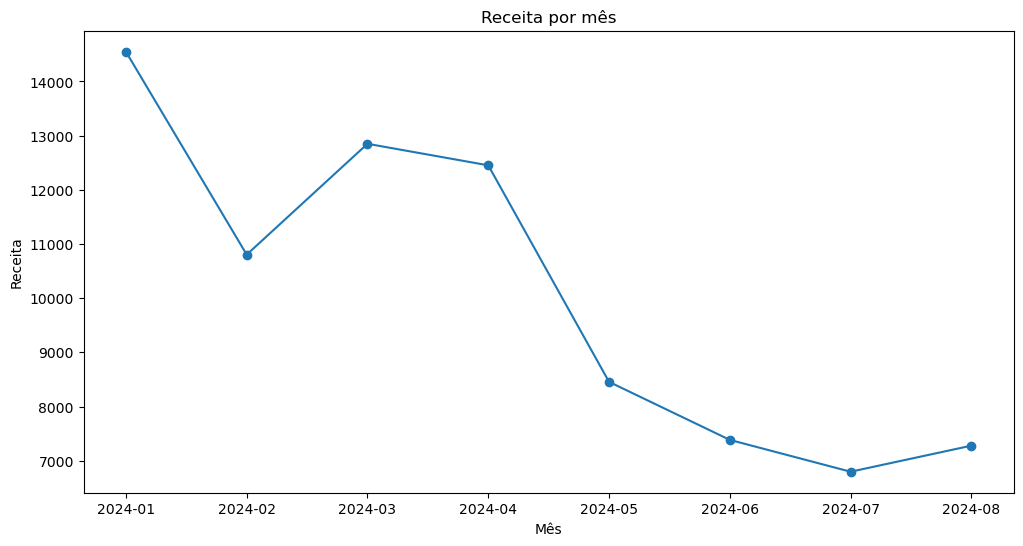

In [31]:
# Gráfico Receita por mês
plt.figure(figsize=(12,6))
plt.plot(Revenue_month['Month'].astype(str), Revenue_month['Total Revenue'], marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receita por mês')
plt.show()

In [32]:
# Vendas por mês por categoria
sales_month_category = df.groupby(['Month','Product Category'])['Units Sold'].sum().reset_index()
sales_month_category


,Month,Product Category,Units Sold
0,2024-01,Beauty Products,5
1,2024-01,Books,14
2,2024-01,Clothing,16
3,2024-01,Electronics,10
4,2024-01,Home Appliances,6
5,2024-01,Sports,17
6,2024-02,Beauty Products,7
7,2024-02,Books,16
8,2024-02,Clothing,19
9,2024-02,Electronics,12


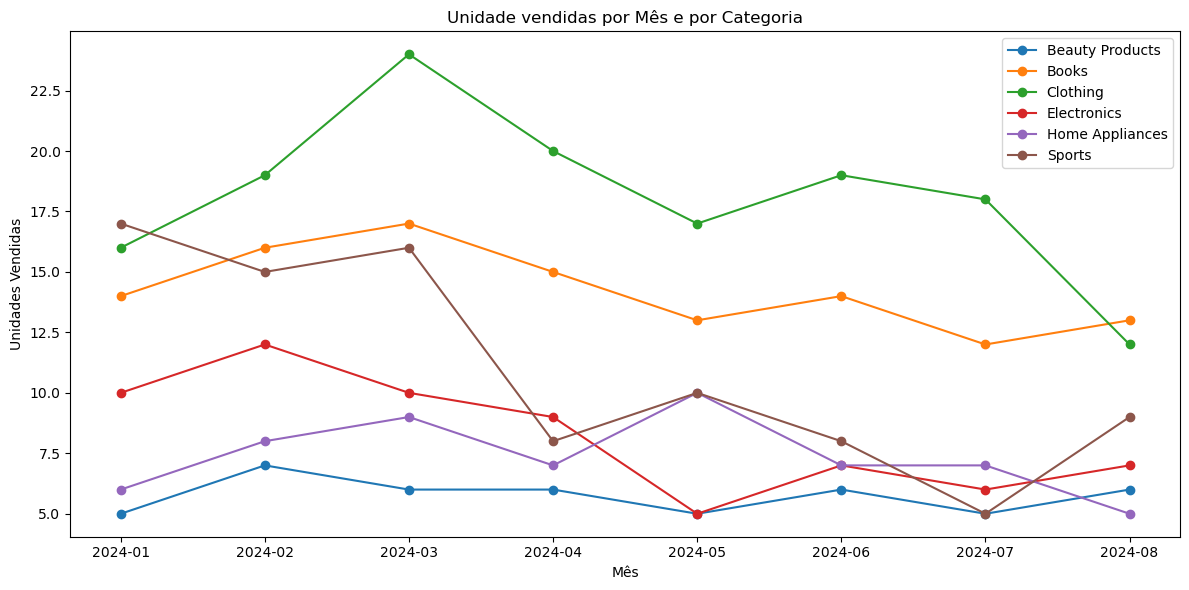

In [33]:
# Gráfico de Unidade vendidas por Mês e por Categoria
plt.figure(figsize=(12,6))

for category in sales_month_category['Product Category'].unique():
    category_data = sales_month_category[sales_month_category['Product Category'] == category]
    plt.plot(category_data['Month'].astype(str),category_data['Units Sold'], marker='o', linestyle='-', label=category)

plt.xlabel('Mês')
plt.ylabel('Unidades Vendidas')
plt.title('Unidade vendidas por Mês e por Categoria')
plt.legend()
plt.tight_layout()
plt.show()
    

In [34]:
# Agrupando Meses, Categorias e suas respectivas receitas
Revenue_month_category = df.groupby(['Month', 'Product Category'])['Total Revenue'].sum().reset_index()
Revenue_month_category

,Month,Product Category,Total Revenue
0,2024-01,Beauty Products,699.95
1,2024-01,Books,308.86
2,2024-01,Clothing,1789.84
3,2024-01,Electronics,7999.90
4,2024-01,Home Appliances,2169.94
5,2024-01,Sports,1579.83
6,2024-02,Beauty Products,331.98
7,2024-02,Books,422.91
8,2024-02,Clothing,1284.81
9,2024-02,Electronics,2899.88


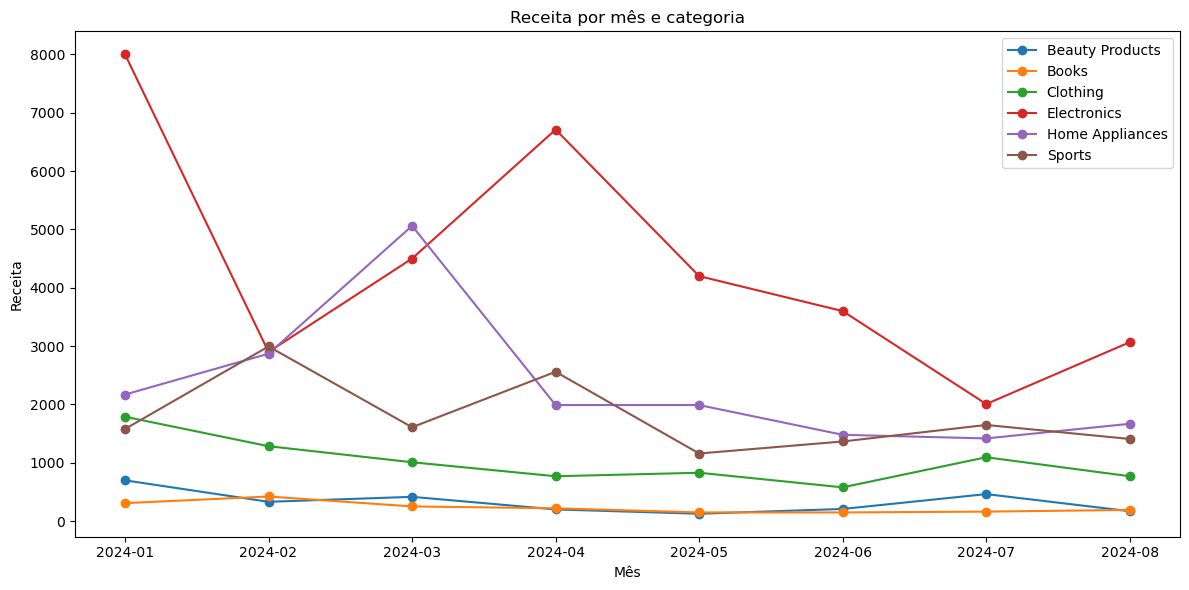

In [35]:
# Gráfico de Receita por mês e categoria
plt.figure(figsize=(12,6))

for category in Revenue_month_category['Product Category'].unique():
    category_data = Revenue_month_category[Revenue_month_category['Product Category'] == category]
    plt.plot(category_data['Month'].astype(str), category_data['Total Revenue'], marker='o', linestyle='-', label=category)

plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receita por mês e categoria')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Como as categorias Eletronics, Home Appliances e Sports são as categorias que geraram maior receita,
# iremos analisar mais profundamente a queda nas vendas dessas categorias.
# Vendas por categorias
sales_month_category = df.groupby(['Month', 'Product Category'])['Units Sold'].sum().reset_index()
filtered_categories = ['Electronics', 'Home Appliances', 'Sports']
sales_month_category = sales_month_category[sales_month_category['Product Category'].isin(filtered_categories)]



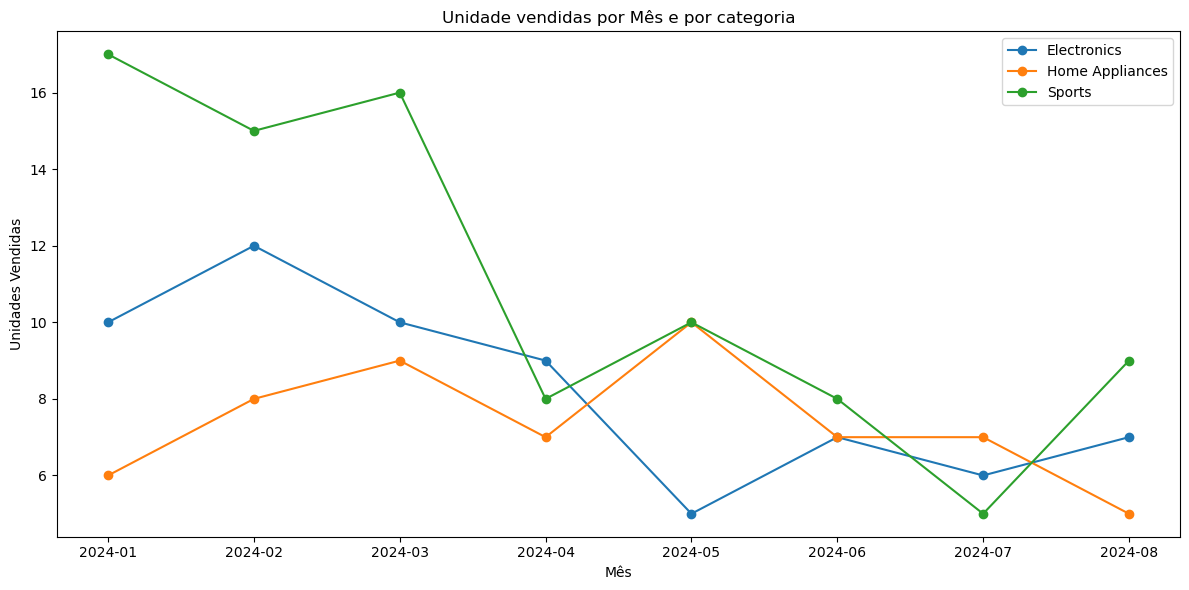

In [37]:
# Gráfico de Unidade vendidas por Mês e por categoria (Eletronics, Home Appliances e Sports).
plt.figure(figsize=(12,6))
for category in sales_month_category['Product Category'].unique():
    category_data = sales_month_category[sales_month_category['Product Category'] == category]
    plt.plot( category_data['Month'].astype(str), category_data['Units Sold'], marker='o', linestyle='-', label=category)

plt.xlabel('Mês')  
plt.ylabel('Unidades Vendidas')
plt.title('Unidade vendidas por Mês e por categoria')
plt.legend()
plt.tight_layout()
plt.show()
    


In [39]:
# Agrupando meses e receitas e categorias(Eletronics, Home Appliances e Sports)
revenue_month_category = df.groupby(['Month','Product Category'])['Total Revenue'].sum().reset_index()

filtered_categories = ['Electronics', 'Home Appliances', 'Sports']
revenue_month_category = revenue_month_category[revenue_month_category['Product Category'].isin(filtered_categories)]


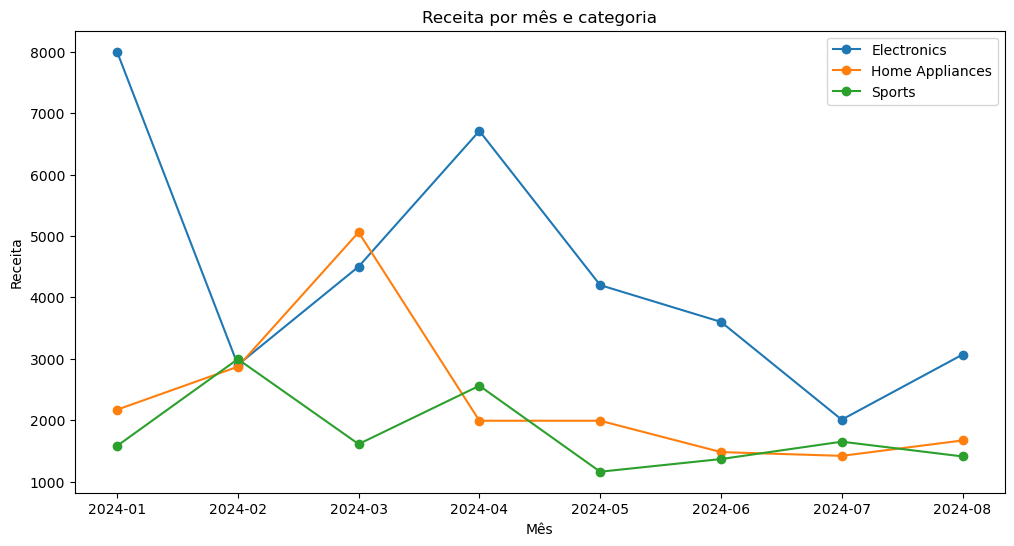

In [40]:
# Gráfico de Receita por mês e categoria (Eletronics, Home Appliances e Sports)
plt.figure(figsize=(12,6))
for category in revenue_month_category['Product Category'].unique():
    category_data = revenue_month_category[revenue_month_category['Product Category'] == category]
    plt.plot(category_data['Month'].astype(str), category_data['Total Revenue'], marker='o', linestyle='-',label=category)
    
plt.xlabel('Mês')   
plt.ylabel('Receita')
plt.title('Receita por mês e categoria')
plt.legend()
plt.show()

In [41]:
# Métodos de pagamento mais utilizado
Payment_Method_count = df.groupby(['Payment Method'])['Transaction ID'].count().reset_index()
Payment_Method_count

,Payment Method,Transaction ID
0,Credit Card,120
1,Debit Card,40
2,PayPal,80


In [42]:
# Métodos de pagamento mais utilizado por região
Payment_Method_Region = df.groupby(['Payment Method','Region'])['Transaction ID'].count().reset_index()
Payment_Method_Region

,Payment Method,Region,Transaction ID
0,Credit Card,Asia,40
1,Credit Card,North America,80
2,Debit Card,Asia,40
3,PayPal,Europe,80
